# Homework 6: Web Development

__Due: Friday, June 12th, 11:59 PM, no submission accepted after June 14th, 11:59 PM.__

In this exercise, you will create a simple webapp using Dash by Plotly and describe how you did it. The skills you will need are:

1. Dash fundamentals, including callbacks.
2. Database skills, including adding items to databases and displaying them.

__You are not required to deploy your app__ to the internet, although you are certainly welcome to do so if you wish.

## Overview
The app you’re going to build is a simple message bank. It should do two things:

1. Allow the user to __submit__ messages to the bank.
2. Allow the user to __view__ a sample of the messages currently stored in the bank.

Additionally, you should style your app to look attractive and interesting! I encourage you to get creative on this.

Your Jupyter Notebook will contain all the code for the app so that when it is exported as a `.py` file, it can run a webapp with the command `python hw6.py`. It should also contain several screencaps from the functioning of your app, as well as a discussion of the Python functions you implemented to create your app. 

You are free to (and indeed encouraged) build on any of the examples from class, as well as any other resources you are able to find. The lecture materials are good starting points.

## Instructions
### 1. Enable Submissions
First, create a `submit` functionality in `app.py` with three user interface elements:

1. A text box for submitting a message.
2. A text box for submitting the name of the user.
3. A "submit" button.

Now, write two Python functions for database management in the file `app.py`.

- `get_message_db()` should handle creating the database of messages.
  1. Check whether there is a database called `message_db` defined in the global scope. If not, then connect to that database and assign it to the global variable `message_db`. To do this last step, write a line like `message_db = sqlite3.connect("messages_db.sqlite")`
  2. Check whether a table called `messages` exists in `message_db`, and create it if not. For this purpose, the SQL command `CREATE TABLE IF NOT EXISTS` is helpful. Give the table a `handle` column (text) and a `message` column (text).
  3. Return the connection `message_db`.
  4. Here is a helpful starter code:
```python
message_db = None
def get_message_db():
    # write some helpful comments here
    global message_db
    if message_db:
        return message_db
    else:
        message_db = sqlite3.connect("messages_db.sqlite", check_same_thread=False)
        cmd = '' # replace this with your SQL query
        cursor = message_db.cursor()
        cursor.execute(cmd)
        return message_db
```

- The function `insert_message(handle, message)` should handle inserting a user message into the database of messages.
  1. Using a cursor, insert the message into the `message` database. Remember that you’ll need to provide the handle and the message itself. You’ll need to write a SQL command to perform the insertion.
    - __Note__: when working directly with SQL commands, it is necessary to run `db.commit()` after inserting a row into `db` in order to ensure that your row insertion has been saved.
    - A column called `rowid` is automatically generated by default. It gives an integer index to each row you add to the database.
    - Close the database connection within the function!
    
- Finally, write a callback function `submit()` to update the components. Maybe it would be nice to add a small note thanking the user for their submission and print an error message if it failed.
  1. Extract the `handle` and the `message` from the components. You’ll need to ensure that your callback deals with the user input by appropriately specifying the property of the input elements. 
  2. You might want to use the keyword argment `prevent_initial_call`. 

### 2. Viewing Random Submissions
Write a function called `random_messages(n)`, which will return a collection of `n` random messages from the `message_db`, or fewer if necessary. This [StackOverflow post](https://stackoverflow.com/questions/2279706/select-random-row-from-a-sqlite-table) might help. Don’t forget to close the database connection within the function!

Next, write a new component to display the messages extracted from `random_messages()`. Once again, here is an example:


Finally, write a callback function `view()` to display random messages. This function should first call `random_messages()` to grab some random messages (I chose a cap of 5), and then display these messages using a loop. It should be triggered when the "update" button is pressed.

### 3. Customize Your App

Here’s an example of the app so far:

<img src="HW6.png" alt="app example" width="500">


Let's customize this app by changing styles! At least, you should

- Incorporate a non-default font.
- Use color in some way.

Feel free to add CSS or other stylesheets in order to give your app a personal feel. Extra credits may be given for a more sophiscated and appealing visual. 

Your app should be a lot more colorful than the screencaps shown in this notebook!!

### 4. The Jupyter Notebook
For your notebook, write a tutorial describing how you constructed your webpage. You should include:

- Separate code blocks and explanations for each of the Python functions you used to build your app (there should be at least five of them).
- Display your app running within the notebook.  
- Your report must include one or two screencaps:
  - You should show an example of a user submitting a message. In the handle field, __please use either your name or your GitHub handle__.
  - You should show an example of a user viewing submitted messages. Show at least two messages, one of which is the message you submitted in the previous screencap. __This message should show your name or GitHub handle__.
- Keep in mind that you are writing a single website. 
Additionally, please include in your report a link to the GitHub repository containing the code for your app.

## Specifications

### Format
0. There is no autograder for this homework. 
  - For `code` section, please submit the `zip` file containing all the files you wrote.
    - This should at least include `hw6.ipynb`, `hw6.py` (the python file converted from this notebook), and the screencaps. 
    - If you used any other file (e.g., image or css style file), please also include them.
  - For the `pdf` section, convert your notebook to a pdf file, as usual.

### Coding Problem
1. Each of the required functions is implemented in a logical way.
2. Each of the required functions appears to successfully achieve the required task.
3. Callback functions also include the appropriate additional functions. For example, the callback function `view()` should call `random_messages()`.
4. Both "submit" and "view" part should be in a single webpage.
5. Some styling should be done; it should be different from what is shown in the class. You should change font and color to be used. Extra credits for a more sophiscasted and visually appealing approach.

### Style and Documentation
6. Helpful comments are supplied throughout the code. __Docstrings are not required in this homework, and you don't need to show the testing of `get_message_db()`, `insert_message()`, and `random_messages()` outside the webapp as well.__

### Writing
7. The overall report is written in engaging and unambiguous English prose. There is written explanations throughout the post, such that a student with the knowledge of the first five weeks of this course could learn to perform the demonstrated tasks by reading the post.
8. Each block of code has a clearly explained purpose.
9. The notebook is organized into clearly delimited sections using markdown headers (#), making it easier for the reader to navigate.
10. The notebook includes the required screencaps demonstrating the submission and viewing pages of the app.
11. The notebook includes a discussion of all Python functions used to create the app. This should include, at minimum, `get_message_db()`, `insert_message()`, `random_messages()`, `submit()`, and `view()`.
12. The notebook launches the app inside it.
13. ~~The notebook includes a link to the GitHub repository containing the code for the app.~~


In [1]:
import sqlite3
import dash
from dash import html
import dash_bootstrap_components as dbc
from dash.dependencies import Input, Output, State

def submit():
    return html.Div(
        dbc.Container(
            [
                html.Div(style={'height': '20px'}),
                # title
                html.H2('A SIMPLE MESSAGE BANK'),
                html.H3('Submit'),
                # user and message input section
                dbc.Container(
                    [
                        dbc.Row(
                            [
                                dbc.Col(
                                    html.Label('Your Message:'),
                                    width=2,
                                    style={'padding': 0}
                                ),
                                dbc.Col(
                                    dbc.Input(placeholder='Cool for the summer', id='message', style={'width': '100%'}),
                                    width=6,
                                    style={'padding': 0}
                                )
                            ]
                        ),
                        dbc.Row(
                            [
                                dbc.Col(
                                    html.Label('Your Name or Handle:'),
                                    width=2,
                                    style={'padding': 0}
                                ),
                                dbc.Col(
                                    dbc.Input(placeholder='Demi', id='nickname', style={'width': '100%'}),
                                    width=6,
                                    style={'padding': 0}
                                )
                            ]
                        ),
                        dbc.Row(
                            dbc.Col(
                                dbc.Button('Submit', id='submit', color='primary', className="mt-2"),
                                width=2,
                                style={'padding': 0}
                            )
                        ),
                        html.Div('Thanks for submitting a message!', style={'paddingTop': '10px'})
                    ],
                    style={'paddingTop': '10px', 'width': '100%'}
                ),
                html.H3('View'),
                # display area
                dbc.Container(
                    id='history-message',
                    style={'paddingTop': '10px', 'width': '100%', 'overflowY': 'auto', 'backgroundColor': '#fafafa'}
                ),
                dbc.Button('Update', id='update', color='primary', className="mt-2"),
                # Hidden div to satisfy callback output requirement
                html.Div(id='dummy-div', style={'display': 'none'})
            ],
            style={'height': 'auto', 'boxShadow': 'rgb(0 0 0 / 20%) 0px 13px 30px, rgb(255 255 255 / 80%) 0px -13px 30px', 'borderRadius': '10px'}
        ),
        style={'paddingTop': '50px'}
    )

message_db = None

This function returns the layout of the Dash app using html.Div and dbc.Container.
It includes input fields for the message and nickname, a submit button, and an update button.
The layout also contains sections to display the title, submit form, and message history.
Purpose: Defines the layout for the message submission and viewing interface.
Usage: Used to set the app.layout.

In [2]:
def get_message_db():
    global message_db

    if message_db:
        message_db = sqlite3.connect("messages_db.sqlite")
        return message_db
    else:
        message_db = sqlite3.connect("messages_db.sqlite", check_same_thread=False)
        cmd = "CREATE TABLE IF NOT EXISTS users(user TEXT, messages TEXT)"  # Modified this line
        cursor = message_db.cursor()
        cursor.execute(cmd)
        return message_db

Purpose: This function connects to the SQLite database. If the connection already exists (message_db is not None), it uses the existing connection. Otherwise, it creates a new connection and sets up the users table if it doesn't already exist.
Usage: Called whenever the app needs to interact with the database.


In [3]:
def insert_message(nickname, message):
    conn = get_message_db()    # connect to the database
    cur = conn.cursor()        # create cursor instance
    cur.execute("INSERT INTO users (user, messages) VALUES (?, ?)", (nickname, message))   # insert a record
    conn.commit()   # commit to save data to disk
    conn.close()

This function inserts a message and a nickname into the users table in the database.
It commits the transaction to save the data and closes the connection.
Purpose: Inserts a new record into the users table of the database.
Usage: Used in the callback function that handles message submission.

In [4]:
def random_messages(n):
    '''
    This function returns a collection 
    of n random messages from the 'message_db'
    '''
    # connect to the database
    db = get_message_db()
    cursor = db.cursor()
    n_random_message = cursor.execute(f"SELECT * FROM users ORDER BY RANDOM() LIMIT {n}").fetchall()

    # Close the database
    db.close()
    # return n random messages
    return n_random_message

This function retrieves a specified number of random messages from the users table in the database.
It executes a SQL query to fetch the random messages and returns them.
Purpose: Retrieves n random messages from the users table in the database.
Usage: Called by the view() function to get messages for display.


In [5]:
def view():
    return random_messages(5)

style = ['https://cdn.staticfile.org/twitter-bootstrap/4.5.2/css/bootstrap.min.css']
app = dash.Dash(__name__, external_stylesheets=style)
app.layout = submit()

This function returns five random messages by calling the random_messages() function with n set to 5. This section initializes the Dash app and sets the layout to the output of the submit() function.
Purpose: Retrieves and returns a fixed number of random messages to be displayed.
Usage: Used in the callback function to update the message board.

In [6]:
@app.callback(
    Output('dummy-div', 'children'),  # Added this dummy output
    Input('submit', 'n_clicks'),
    [State('nickname', 'value'),
     State('message', 'value')],
    prevent_initial_call=True  # Prevent callback from running on page load
)
def refresh_message_board(n_clicks, nickname, message):
    if nickname and message:
        insert_message(str(nickname), str(message))
    return ''  # Return an empty string

This callback function is triggered when the submit button is clicked.
It takes the values from the nickname and message input fields and inserts them into the database using the insert_message() function.

In [7]:
@app.callback(
    Output('history-message', 'children'),
    Input("update", "n_clicks")
)
def refresh(n_clicks):
    if n_clicks:
        return [
            html.Div(
                [
                    html.P(record[1]),
                    html.Strong(f"- {record[0]}")
                ],
                style={'paddingTop': '10px'}
            )
            for record in view()
        ]

This callback function is triggered when the update button is clicked.
It fetches five random messages using the view() function and returns a list of HTML Div elements to display the messages and nicknames.

In [8]:
if __name__ == '__main__':
    app.run_server(debug=True, port=8052)


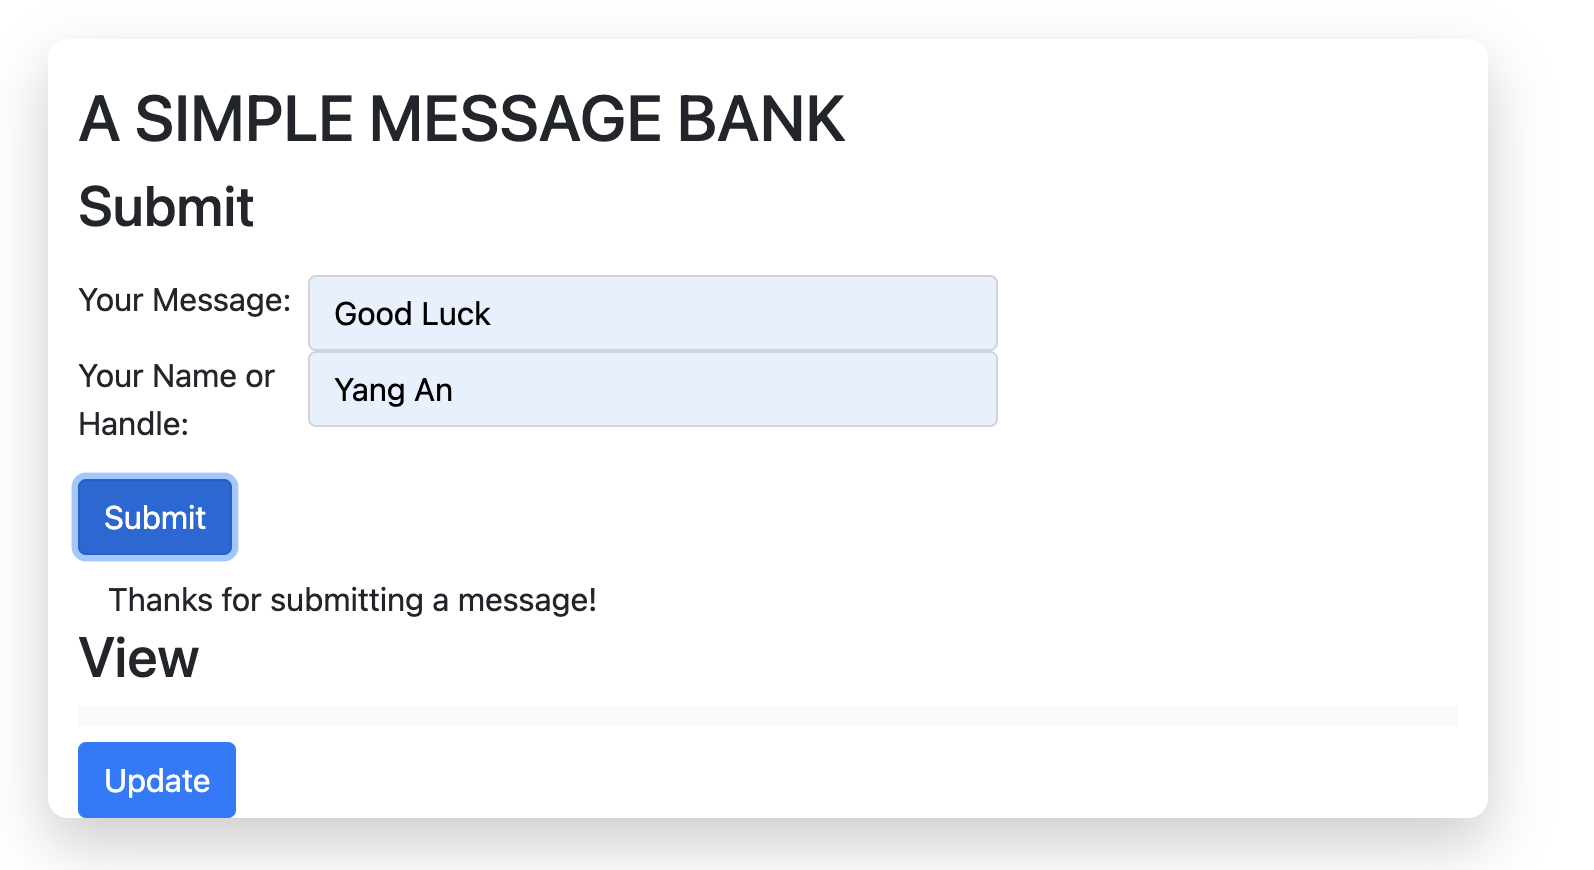

In [9]:
from IPython.display import Image, display

display(Image(filename='hw6_1.png'))



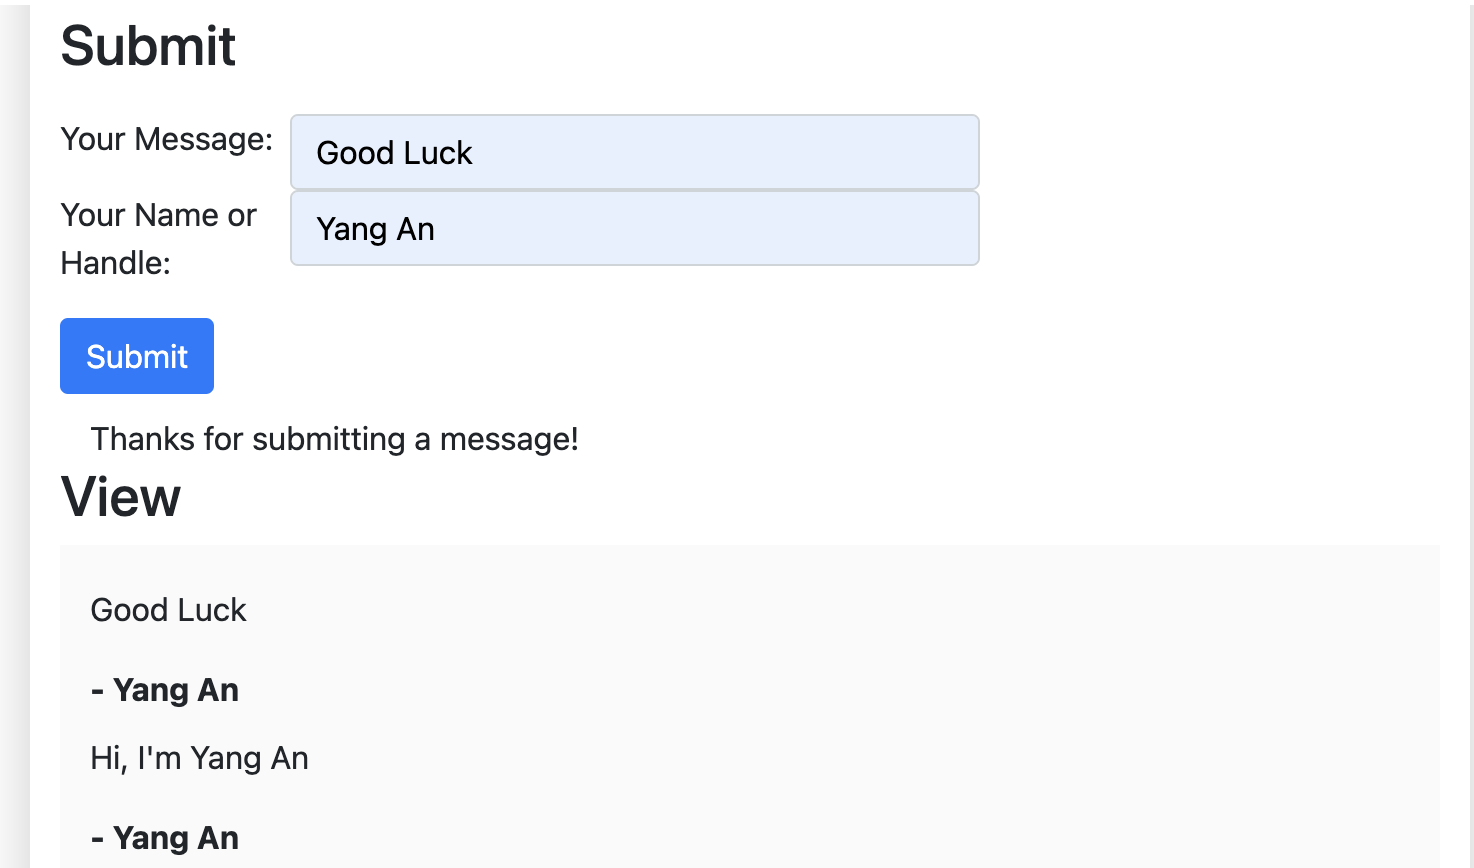

In [10]:
display(Image(filename='hw6_2.png'))